In [28]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [5]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [6]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just WNT group

In [7]:
wnt_list = set()

for column in data.columns:
    if "WNT" in column: 
        wnt_list = wnt_list.union(set(data[column].replace({"":None}).dropna()))   

print(wnt_list)

{'LHX2', 'MSX2', 'HOXDB', 'EMX2', 'CSNK2B', 'ZIC1', 'NKD1', 'LEF1', 'NKD2', 'PAX3', 'CTNNB1', 'TP53', 'TENA', 'SMARCA4', 'DDX3X', 'MAF', 'RUNX2', 'LET7', 'ONECUT2', 'ZIC4', 'DMRT2', 'HOXDB13'}


# Creating a Network starting from All Omnipath interactions

In [8]:
wnt_net = Network(wnt_list, resources = omnipath)

Error: node HOXDB is not present in the resources database
Error: node TENA is not present in the resources database
Error: node LET7 is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node DMRT2 is not present in the resources database
Error: node HOXDB13 is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [9]:
wnt_net.add_node("HOXD13")

In [10]:
wnt_net.add_node("HOXD9")

In [13]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,LHX2,P50458,NaN
1,MSX2,P35548,NaN
2,EMX2,Q04743,NaN
3,CSNK2B,P67870,NaN
4,ZIC1,Q15915,NaN
5,NKD1,Q969G9,NaN
6,LEF1,Q9UJU2,NaN
7,NKD2,Q969F2,NaN
8,PAX3,P23760,NaN
9,CTNNB1,P35222,NaN


In [17]:
wnt_net.complete_connection(maxlen=6, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

In [18]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,LHX2,P50458,NaN
1,MSX2,P35548,NaN
2,EMX2,Q04743,NaN
3,CSNK2B,P67870,NaN
4,ZIC1,Q15915,NaN
...,...,...,...
70,NFE2L2,Q16236,NaN
71,PRDX1,Q06830,NaN
72,CDKN2A,P42771,NaN
73,CDC25A,P30304,NaN


In [19]:
wnt_net.edges

,source,target,Type,Effect,References
0,P35548,P56178,None,inhibition,HPRD:9111364;SIGNOR:9111364;SPIKE_LC:16189514
1,P56178,P28360,None,inhibition,SIGNOR:9111364
2,P28360,P50458,None,inhibition,HPRD:9697309;SIGNOR:9697309
3,P50458,P28360,None,inhibition,HPRD:9697309;SIGNOR:9697309
4,P56178,P35548,None,inhibition,HPRD:9111364;SIGNOR:9111364;SPIKE_LC:16189514
...,...,...,...,...,...
215,P49841,P30304,None,inhibition,KEA:17570479;PhosphoSite:18480045;ProtMapper:1...
216,P53355,P42771,None,stimulation,SPIKE:11146619;SPIKE_LC:11146619
217,P84022,P26367,None,inhibition,SIGNOR:17251190
218,P26367,O75444,None,stimulation,SPIKE:12128206;SPIKE_LC:12128206


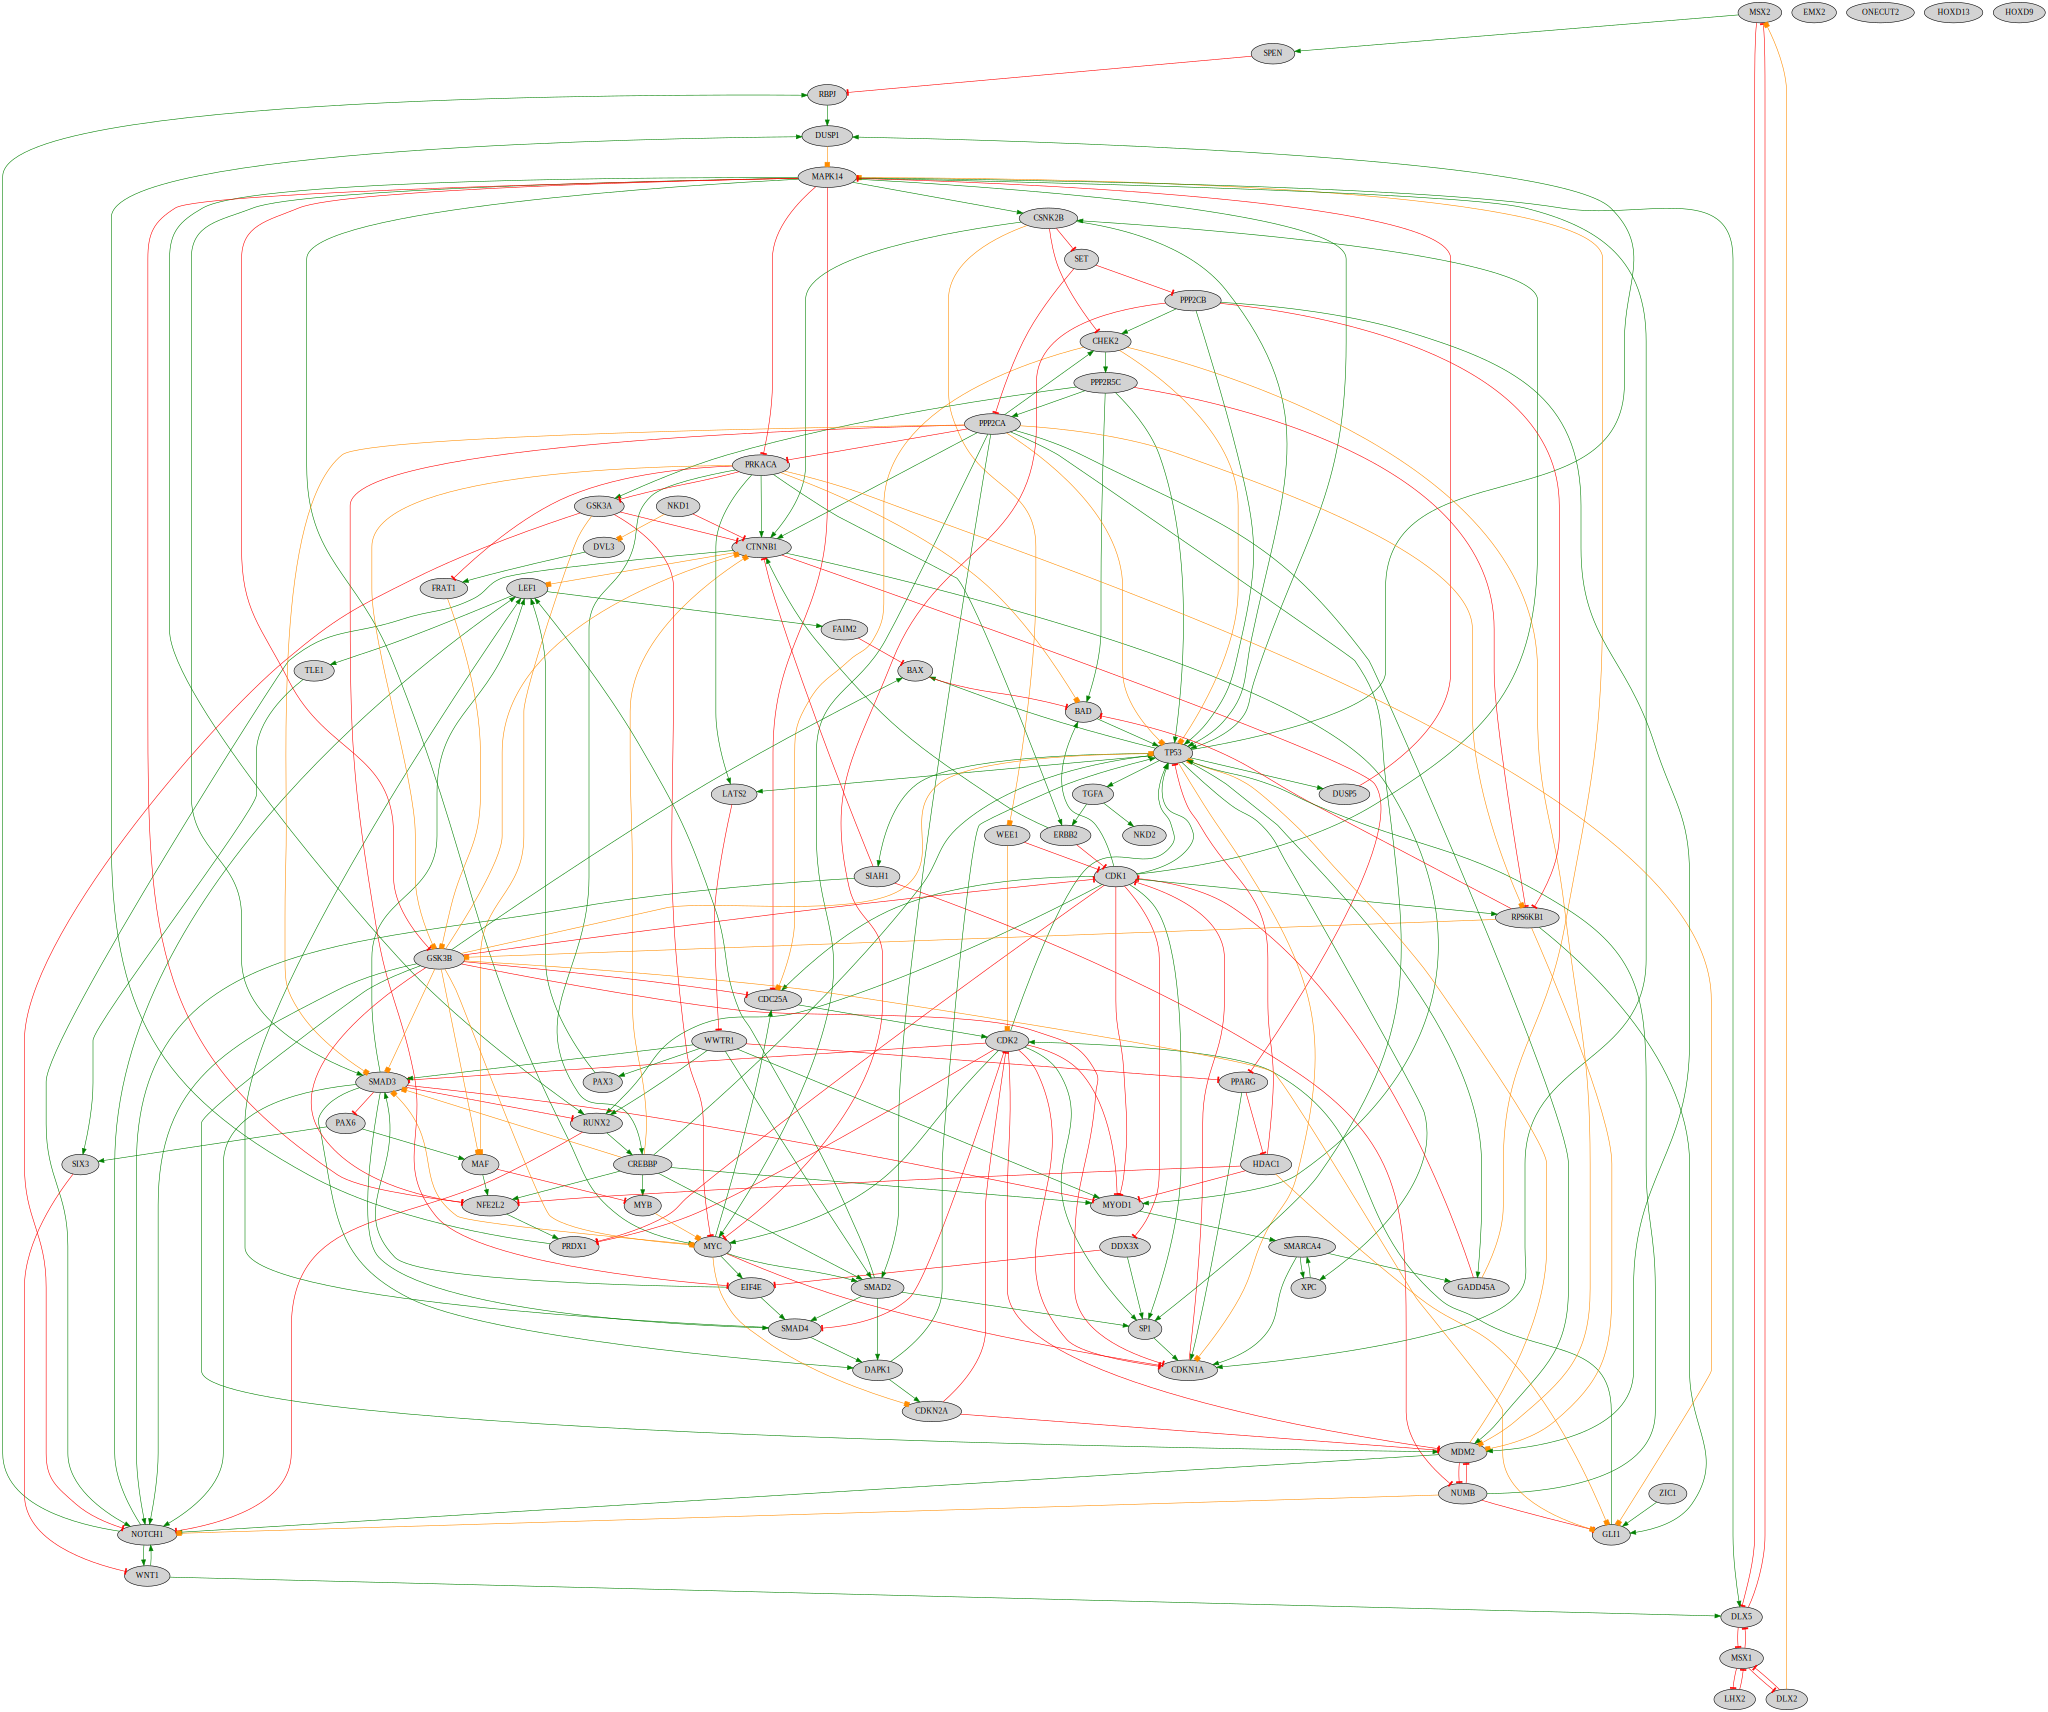

In [20]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect')
output = figures_folder + "WNT_all_omnipath"
wnt_visualizer.render(output_file=output)

# Exporting Network in sif file

In order to export a fully connected network in sif file, I remove the nodes that are not connected

In [29]:
from neko._outputs.exports import Exports

In [22]:
wnt_net.remove_node("EMX2")

In [23]:
wnt_net.remove_node("ONECUT2")

In [24]:
wnt_net.remove_node("HOXD13")

In [25]:
wnt_net.remove_node("HOXD9")

In [30]:
export = Exports(wnt_net)

In [31]:
export.export_sif(sif_output + "WNT_omnipath.sif")